# Dimensionality Reduction

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Eigenvalues-and-Eigenvectors" data-toc-modified-id="Eigenvalues-and-Eigenvectors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Eigenvalues and Eigenvectors</a></span></li><li><span><a href="#Linear-PCA" data-toc-modified-id="Linear-PCA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Linear PCA</a></span><ul class="toc-item"><li><span><a href="#Create-a-dataset" data-toc-modified-id="Create-a-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Create a dataset</a></span></li><li><span><a href="#Compute-the-sample-covariance-matrix-from-the-zero-mean-data" data-toc-modified-id="Compute-the-sample-covariance-matrix-from-the-zero-mean-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Compute the sample covariance matrix from the zero-mean data</a></span></li><li><span><a href="#Compute-the-eigenpairs-of-the-covariance-matrix-to-get-PCs" data-toc-modified-id="Compute-the-eigenpairs-of-the-covariance-matrix-to-get-PCs-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Compute the eigenpairs of the covariance matrix to get PCs</a></span></li><li><span><a href="#Apply-data-transformation-to-reduce-dimension" data-toc-modified-id="Apply-data-transformation-to-reduce-dimension-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Apply data transformation to reduce dimension</a></span></li><li><span><a href="#In-Class-Assignment-:-PCA" data-toc-modified-id="In-Class-Assignment-:-PCA-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><font color="orange">In-Class Assignment : PCA<font></font></font></a></span></li></ul></li><li><span><a href="#Kernel-PCA" data-toc-modified-id="Kernel-PCA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Kernel PCA</a></span><ul class="toc-item"><li><span><a href="#Concentric-circles-data" data-toc-modified-id="Concentric-circles-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Concentric circles data</a></span></li><li><span><a href="#Swiss-roll-data" data-toc-modified-id="Swiss-roll-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Swiss roll data</a></span></li></ul></li><li><span><a href="#Multidimensional-Distance-Scaling-(MDS)" data-toc-modified-id="Multidimensional-Distance-Scaling-(MDS)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Multidimensional Distance Scaling (MDS)</a></span></li><li><span><a href="#Locally-Linear-Embedding-(LLE)" data-toc-modified-id="Locally-Linear-Embedding-(LLE)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Locally Linear Embedding (LLE)</a></span></li><li><span><a href="#ISOMAP" data-toc-modified-id="ISOMAP-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ISOMAP</a></span></li></ul></div>

**Load necessary packages and apply custom configurations**

In [2]:
#Change the path to where you put the file
#%run  /Users/peerapon/iCloud/jupyter-libs/load-packages.ipynb
import warnings; 
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['grid.linestyle'] = ':'   
plt.rcParams['axes.grid'] = False

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.color_palette("RdBu", n_colors=10)

#%matplotlib notebook # Lead to interactive plots embedded within the notebook
%matplotlib inline  
%config InlineBackend.figure_formats = {'png', 'retina'}

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#pd.options.plotting.backend = "plotly" 
#Conflict with options in original matplotlib.

print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)
print('Seaborn version', sns.__version__)

Numpy version 1.21.5
Pandas version 1.3.5
Seaborn version 0.11.2


## Eigenvalues and Eigenvectors

In [3]:
import numpy as np

np.set_printoptions(suppress=True,precision=4)

A = np.array([[1,-2],[1,4]])
egval,egvec = np.linalg.eig(A)
print(egval)
print(egvec)
np.linalg.norm(egvec[:,0])
np.linalg.norm(egvec[:,1])

[2. 3.]
[[-0.8944  0.7071]
 [ 0.4472 -0.7071]]


0.9999999999999999

0.9999999999999999

In [4]:
A = np.array([[6,-2,-1],[-2,6,-1],[-1,-1,5]])
egval,egvec = np.linalg.eig(A)
print(egval)
print(egvec)
np.linalg.norm(egvec[:,0])
np.linalg.norm(egvec[:,1])

[3. 8. 6.]
[[ 0.5774  0.7071 -0.4082]
 [ 0.5774 -0.7071 -0.4082]
 [ 0.5774 -0.      0.8165]]


0.9999999999999999

1.0

In [5]:
A

array([[ 6, -2, -1],
       [-2,  6, -1],
       [-1, -1,  5]])

## Linear PCA

### Create a dataset 
rows = instances, columns = features  
Scale each column to zero means

[[ 9 39]
 [15 56]
 [25 93]
 [14 61]
 [10 50]
 [18 75]
 [ 0 32]
 [16 85]
 [ 5 42]
 [19 70]
 [16 66]
 [20 80]]
[[ -4.9167 -23.4167]
 [  1.0833  -6.4167]
 [ 11.0833  30.5833]
 [  0.0833  -1.4167]
 [ -3.9167 -12.4167]
 [  4.0833  12.5833]
 [-13.9167 -30.4167]
 [  2.0833  22.5833]
 [ -8.9167 -20.4167]
 [  5.0833   7.5833]
 [  2.0833   3.5833]
 [  6.0833  17.5833]]


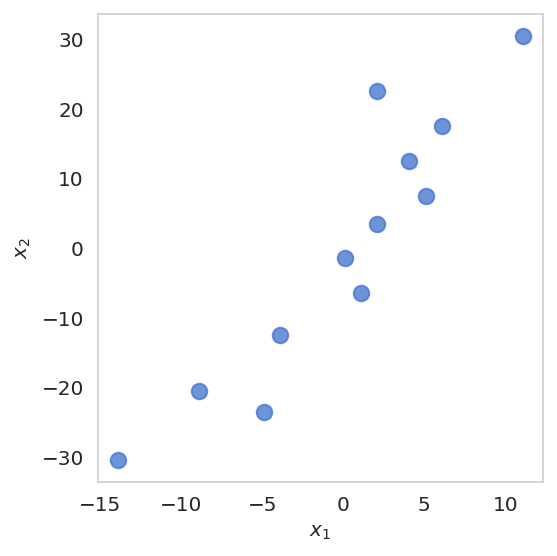

In [ ]:
x1 = np.array([9,15,25,14,10,18,0,16,5,19,16,20])
x2 = np.array([39,56,93,61,50,75,32,85,42,70,66,80])

D = np.vstack((x1,x2)).T # Or D = np.stack((x1,x2), axis=1)
print(D)

# Center the data to zero mean.
X = D - D.mean(axis=0, keepdims=True)
print(X)
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1],marker='o',s=60, alpha=0.8);
plt.xlabel('$x_1$'); plt.ylabel('$x_2$');
plt.tight_layout();

### Compute the sample covariance matrix from the zero-mean data

In [ ]:
Z = np.cov(X, rowvar=False) # Columns as variables
print(Z)

[[ 47.7197 122.947 ]
 [122.947  370.0833]]


### Compute the eigenpairs of the covariance matrix to get PCs
pick the first two with largest eigenvalues

In [ ]:
# sort these based on the eigenvalues
egval,egvec = np.linalg.eig(Z)

egvec = egvec[:,np.argsort(-egval)]
egval = egval[np.argsort(-egval)]
print("Eigenvalues: \n", egval)
print("Eigenvectors: \n", egvec)

Eigenvalues: 
 [411.6219   6.1812]
Eigenvectors: 
 [[-0.3201 -0.9474]
 [-0.9474  0.3201]]


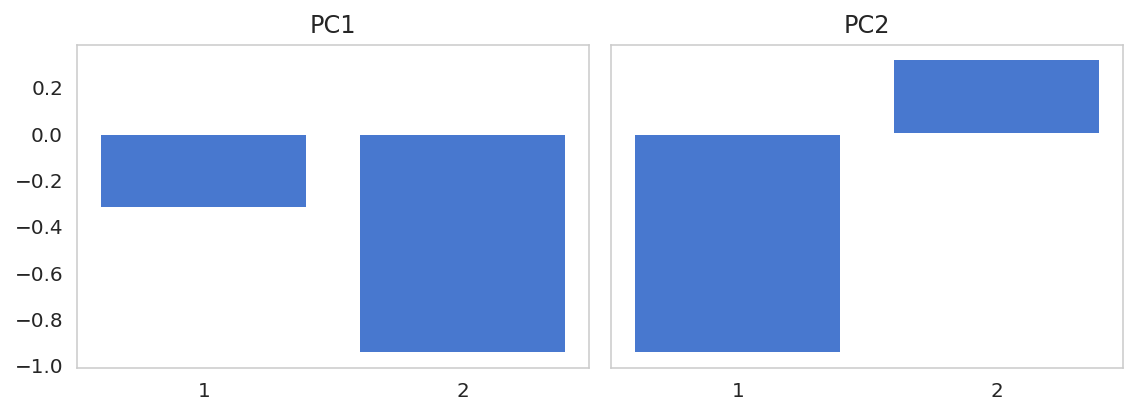

In [ ]:
r = 2
org_dim = X.shape[1]

f, ax = plt.subplots(1, r, sharey=True, figsize=(8,3)) 

for i in range(r):
    ax[i].bar(list(map(str,range(1,org_dim+1))), egvec[:,i])
    ax[i].set_title('PC{}'.format(i+1))
plt.tight_layout();

### Apply data transformation to reduce dimension

In [ ]:
Pr = egvec[:,0:r]
print("Principal components: \n", Pr)

X_pca = X @ Pr
print("Transformed data: \n", X_pca)

# Total variation explained by the first r PCs
for i in range(r):
  print("Component {}: {:.2f}%".format(i+1, egval[i]*100/sum(egval)))

print("All {} components: {:.1f}%".format(r, sum(egval[:r])*100/sum(egval)))

Principal components: 
 [[-0.3201 -0.9474]
 [-0.9474  0.3201]]
Transformed data: 
 [[ 23.7584  -2.8373]
 [  5.7323  -3.0802]
 [-32.5219  -0.711 ]
 [  1.3155  -0.5324]
 [ 13.0171  -0.2637]
 [-13.2283   0.1592]
 [ 33.2709   3.4487]
 [-22.0621   5.2548]
 [ 22.1966   1.9125]
 [ -8.8115  -2.3886]
 [ -4.0617  -0.8268]
 [-18.6054  -0.1352]]
Component 1: 98.52%
Component 2: 1.48%
All 2 components: 100.0%


**Covariance matrix of the transformed data**

In [ ]:
np.cov(X_pca, rowvar=False)

array([[411.6219,   0.    ],
       [  0.    ,   6.1812]])

**Plot the original data against the one converted from the first few PCs.**

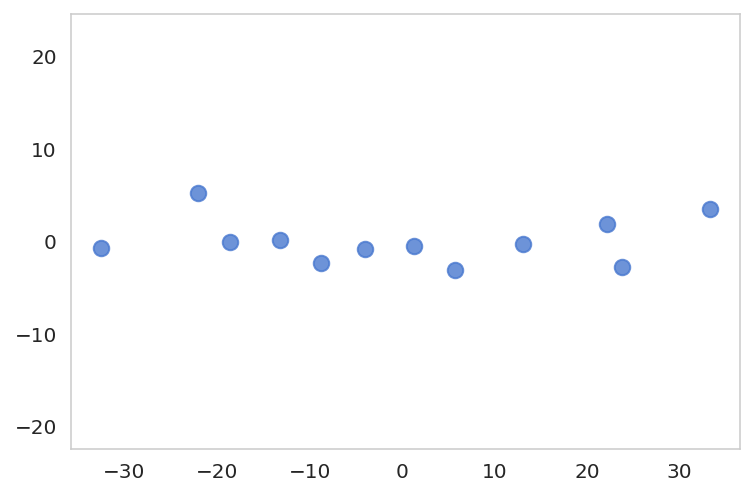

In [ ]:
# Plot transformed data.
plt.figure();
plt.scatter(X_pca[:,0], X_pca[:, 1], alpha=0.8, s=60)
plt.axis('equal');

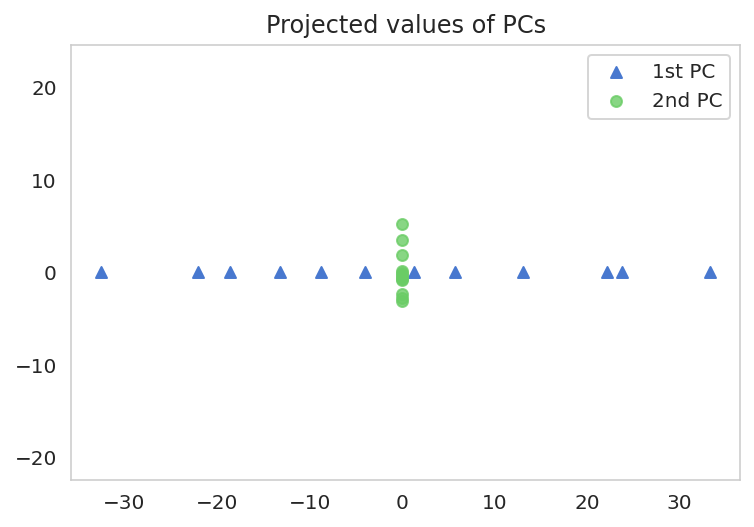

In [ ]:
plt.figure()
plt.scatter(X_pca[:,0], np.zeros_like(X_pca[:,0]),marker='^',s=30)
plt.scatter(np.zeros_like(X_pca[:,1]), X_pca[:,1],alpha=0.8,s=30)
plt.legend(['1st PC','2nd PC'])

plt.axis('equal');
plt.title('Projected values of PCs'); pass;

### <font color='orange'>In-Class Assignment : PCA<font>

(a) What is the dimension of the dataset?
### ANS 

In [ ]:
X=[[0.6857,-0.0393,1.2737,0.5169],[-0.0393,0.1880,-0.3217,-0.1180],[1.2737 ,-0.3217 ,3.1132 ,1.2964],[0.5169 ,-0.1180,1.2964,0.5824]]
X = pd.DataFrame(X)
print(X)
X.shape

        0       1       2       3
0  0.6857 -0.0393  1.2737  0.5169
1 -0.0393  0.1880 -0.3217 -0.1180
2  1.2737 -0.3217  3.1132  1.2964
3  0.5169 -0.1180  1.2964  0.5824


(4, 4)

(b) How much of the total variance is explained by the first principal component ?
### Ans = 4.2249 / 4.2249+0.2422+0.0785+0.0237 % =92.4627404635 %

In [ ]:
# sort these based on the eigenvalues
egval,egvec = np.linalg.eig(X)

egvec = egvec[:,np.argsort(-egval)]
egval = egval[np.argsort(-egval)]
print("Eigenvalues: \n", egval)
print("Eigenvectors: \n", egvec)
r=1
for i in range(r):
  print("Component {}: {:.2f}%".format(i+1, egval[i]*100/sum(egval)))

print("All {} components: {:.1f}%".format(r, sum(egval[:r])*100/sum(egval)))

Eigenvalues: 
 [4.2249 0.2422 0.0785 0.0237]
Eigenvectors: 
 [[ 0.3616 -0.6565 -0.5811  0.3171]
 [-0.0823 -0.7297  0.5966 -0.3238]
 [ 0.8566  0.1757  0.0727 -0.4797]
 [ 0.3588  0.0748  0.5487  0.7514]]
Component 1: 92.46%
All 1 components: 92.5%


(c) For a datapoint x = [5.8 2.7 5.1 1.9], what is the reduced dimension data by using the first two principal
components?
### ANS = [[ 6.9254 -4.7398]]

In [ ]:
X=[[5.8 ,2.7, 5.1, 1.9]]

Pr = egvec[:,:r]
print("Principal components: \n", Pr)

X_pca = X @ Pr
print("Transformed data: \n", X_pca)

Principal components: 
 [[ 0.3616 -0.6565]
 [-0.0823 -0.7297]
 [ 0.8566  0.1757]
 [ 0.3588  0.0748]]
Transformed data: 
 [[ 6.9254 -4.7398]]


(d) What is the reconstructed data point of the transformed data in (c) ?


In [ ]:
x_recon = X_pca @ egvec[:,:r]
x_recon

ValueError: ignored

## Kernel PCA
https://sebastianraschka.com/Articles/2014_kernel_pca.html#kernel-functions-and-the-kernel-trick

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def stepwise_kpca(X, gamma, n_components):
    """
    Implementation of a RBF kernel PCA.

    Arguments:
        X: A MxN dataset as NumPy array where the samples are stored as rows (M),
           and the attributes defined as columns (N).
        gamma: A free parameter (coefficient) for the RBF kernel.
        n_components: The number of components to be returned.

    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    # Computing the MxM kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pca = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))

    return X_pca

### Concentric circles data

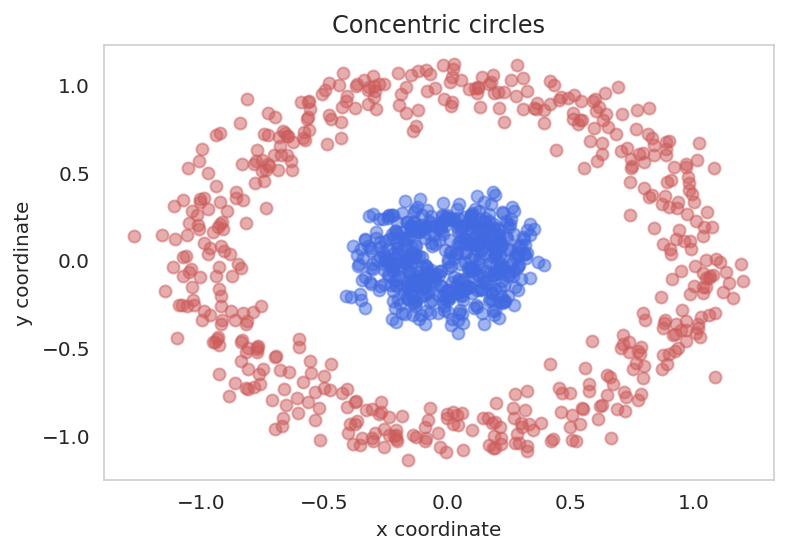

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.figure(figsize=(6,4))

plt.scatter(X[y==0, 0], X[y==0, 1], color='indianred', alpha=0.5) # Class 1
plt.scatter(X[y==1, 0], X[y==1, 1], color='royalblue', alpha=0.5) # Class 2
plt.title('Concentric circles')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show();

**Apply linear PCA**

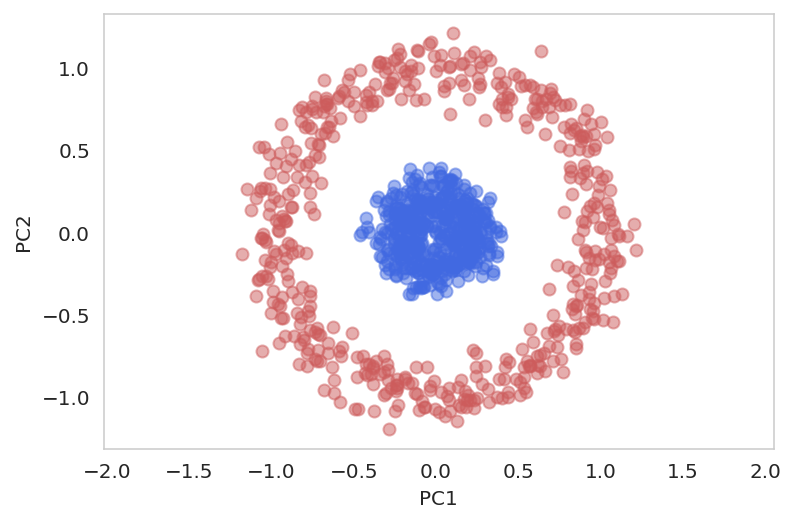

In [ ]:
from sklearn.decomposition import PCA


scikit_pca = PCA(n_components=2)
X_pca = scikit_pca.fit_transform(X)

# Plot transformed data.
plt.figure();
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='indianred', alpha=0.5) # Class 1
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='royalblue', alpha=0.5) # Class 2
plt.axis('equal');
plt.xlabel('PC1'); plt.ylabel('PC2'); pass;

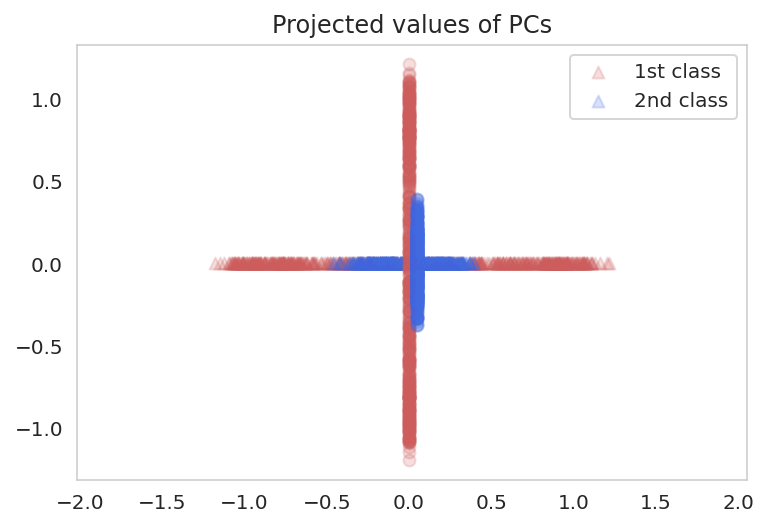

In [ ]:
plt.figure()

plt.scatter(X_pca[y==0,0], np.zeros_like(X_pca[y==0,0]),color='indianred', alpha=0.2, marker='^')
plt.scatter(X_pca[y==1,0], np.zeros_like(X_pca[y==1,0]),color='royalblue', alpha=0.2, marker='^')


plt.scatter(np.zeros_like(X_pca[y==0,1]), X_pca[y==0,1],color='indianred', alpha=0.2, marker='o')
plt.scatter(np.zeros_like(X_pca[y==1,1])+0.05, X_pca[y==1,1],color='royalblue', alpha=0.2, marker='o')

plt.legend(['1st class','2nd class'])

plt.axis('equal');
plt.title('Projected values of PCs'); pass;

**Apply non-linear PCA with RBF kernel**

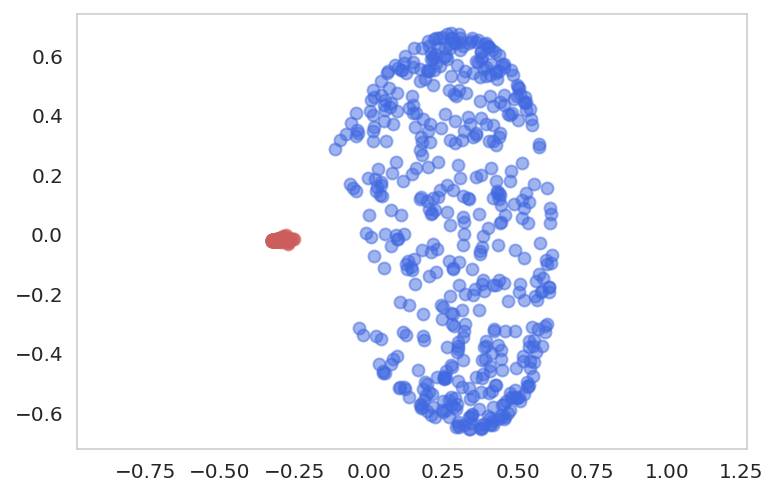

In [ ]:
from sklearn.decomposition import KernelPCA

#X_pca = stepwise_kpca(X, gamma=15, n_components=1)

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=15)
X_pca_rbf = rbf_pca.fit_transform(X)
  
# Plot transformed data.
plt.figure();
plt.scatter(X_pca_rbf[y==0, 0], X_pca_rbf[y==0, 1], color='indianred', alpha=0.5) # Class 1
plt.scatter(X_pca_rbf[y==1, 0], X_pca_rbf[y==1, 1], color='royalblue', alpha=0.5) # Class 2
plt.axis('equal');

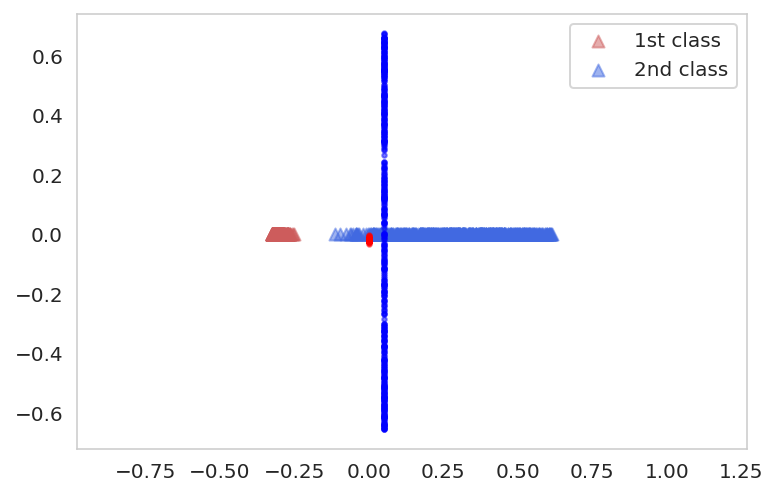

In [ ]:
plt.figure()
plt.scatter(X_pca_rbf[y==0,0], np.zeros_like(X_pca_rbf[y==0,0]),color='indianred', alpha=0.5, marker='^')
plt.scatter(X_pca_rbf[y==1,0], np.zeros_like(X_pca_rbf[y==1,0]),color='royalblue', alpha=0.5, marker='^')


plt.scatter(np.zeros_like(X_pca_rbf[y==0,1]), X_pca_rbf[y==0,1],color='red', alpha=0.5, marker='o',s=5)
plt.scatter(np.zeros_like(X_pca_rbf[y==1,1])+0.05, X_pca_rbf[y==1,1],color='blue', alpha=0.5, marker='o',s=5)

plt.legend(['1st class','2nd class'])

plt.axis('equal');

### Swiss roll data

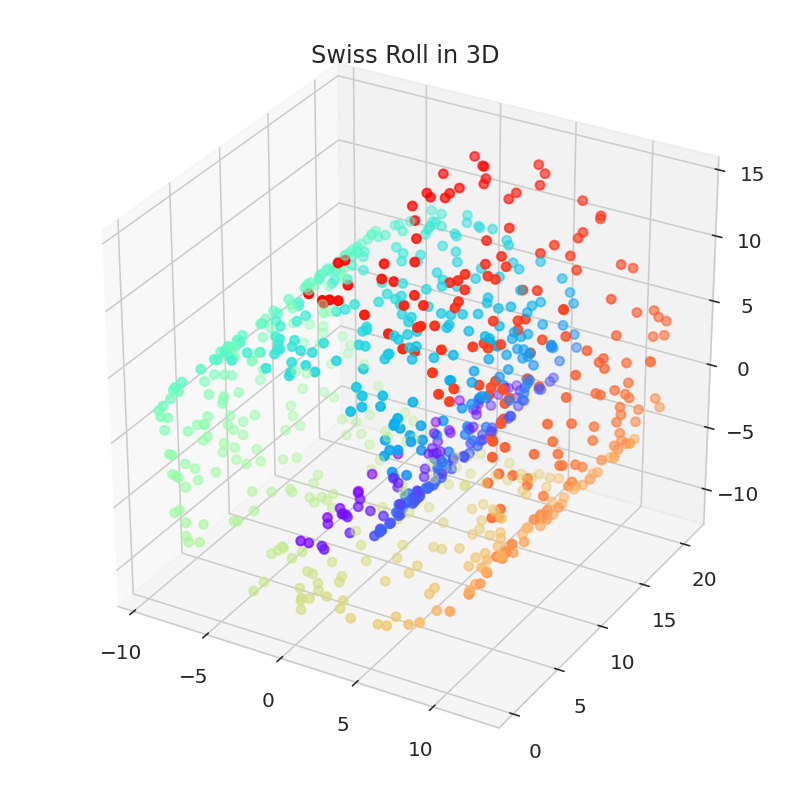

In [ ]:
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

X, color = make_swiss_roll(n_samples=800, random_state=123)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
plt.title('Swiss Roll in 3D')
plt.show(); 

**Apply linear PCA**

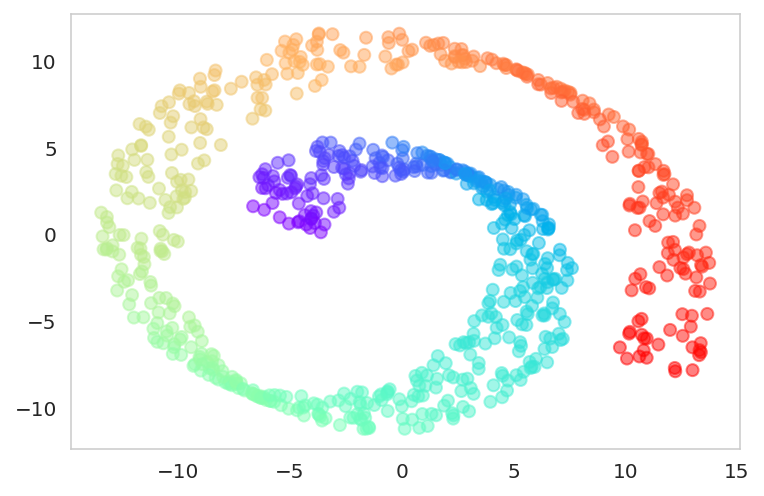

In [ ]:
from sklearn.decomposition import PCA


scikit_pca = PCA(n_components=2)
X_pca = scikit_pca.fit_transform(X)

# Plot transformed data.
plt.figure();
plt.scatter(X_pca[:,0], X_pca[:, 1], c=color, cmap=plt.cm.rainbow, alpha=0.5)
pass;

**Apply non-linear PCA with RBF kernel**

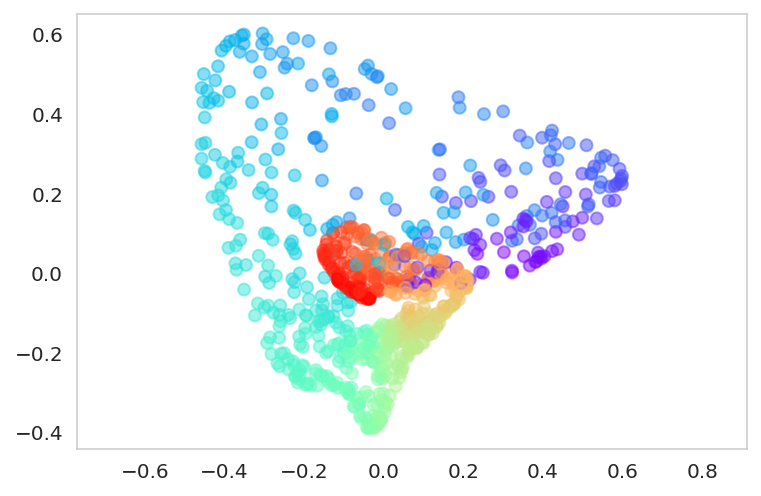

In [ ]:
from sklearn.decomposition import KernelPCA


rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_pca_rbf = rbf_pca.fit_transform(X)
  
# Plot transformed data.
plt.figure();
plt.scatter(X_pca_rbf[:, 0], X_pca_rbf[:, 1], c=color, cmap=plt.cm.rainbow, alpha=0.5)
plt.axis('equal');

## Multidimensional Distance Scaling (MDS)

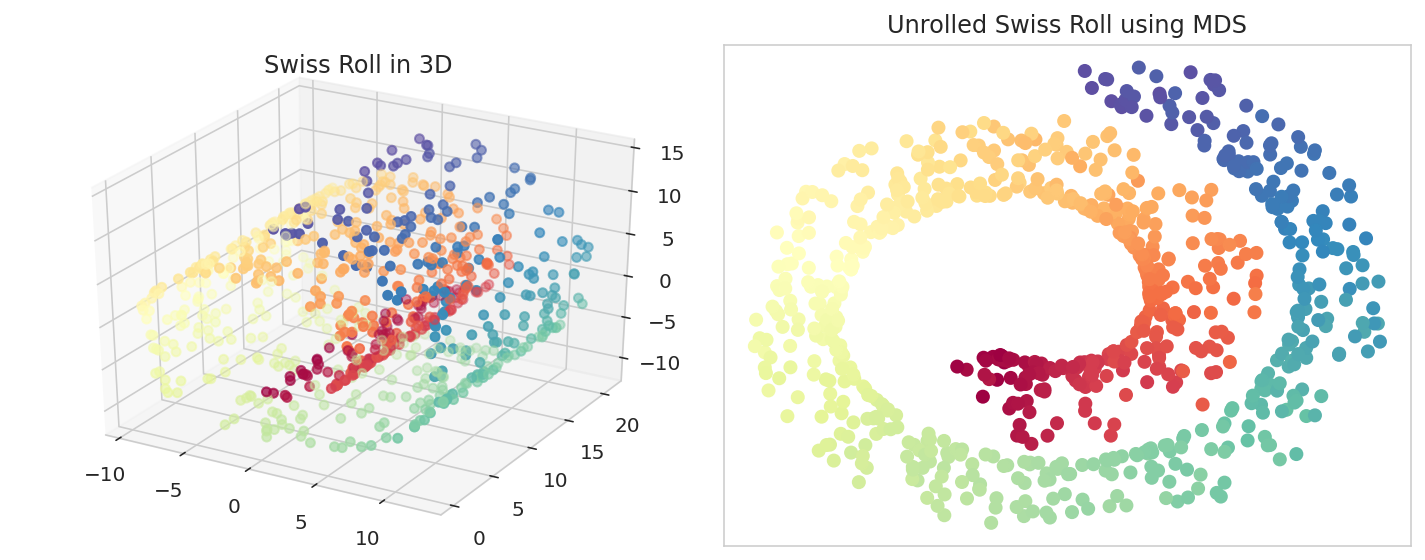

In [ ]:
from sklearn import manifold
from sklearn.metrics.pairwise import pairwise_distances

X, color = make_swiss_roll(n_samples=800, random_state=123)


dist_matrix=pairwise_distances(X, metric='euclidean')

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(dist_matrix)

X_mds = results.embedding_


fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Swiss Roll in 3D")
ax = fig.add_subplot(122)
ax.scatter(X_mds[:, 0], X_mds[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Unrolled Swiss Roll using MDS')
plt.tight_layout();

## Locally Linear Embedding (LLE)

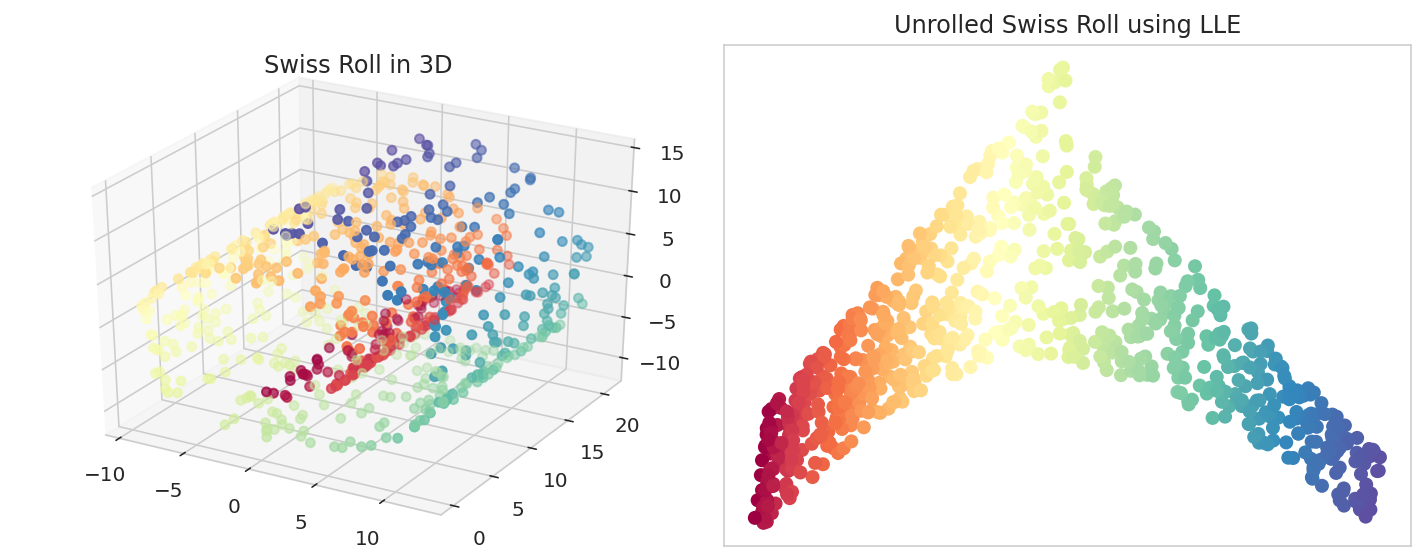

In [ ]:
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

X, color = make_swiss_roll(n_samples=800, random_state=123)


from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)
  
  
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Swiss Roll in 3D")
ax = fig.add_subplot(122)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Unrolled Swiss Roll using LLE')
plt.tight_layout();

## ISOMAP

LLE: 0.13 sec
ISOMAP: 0.37 sec


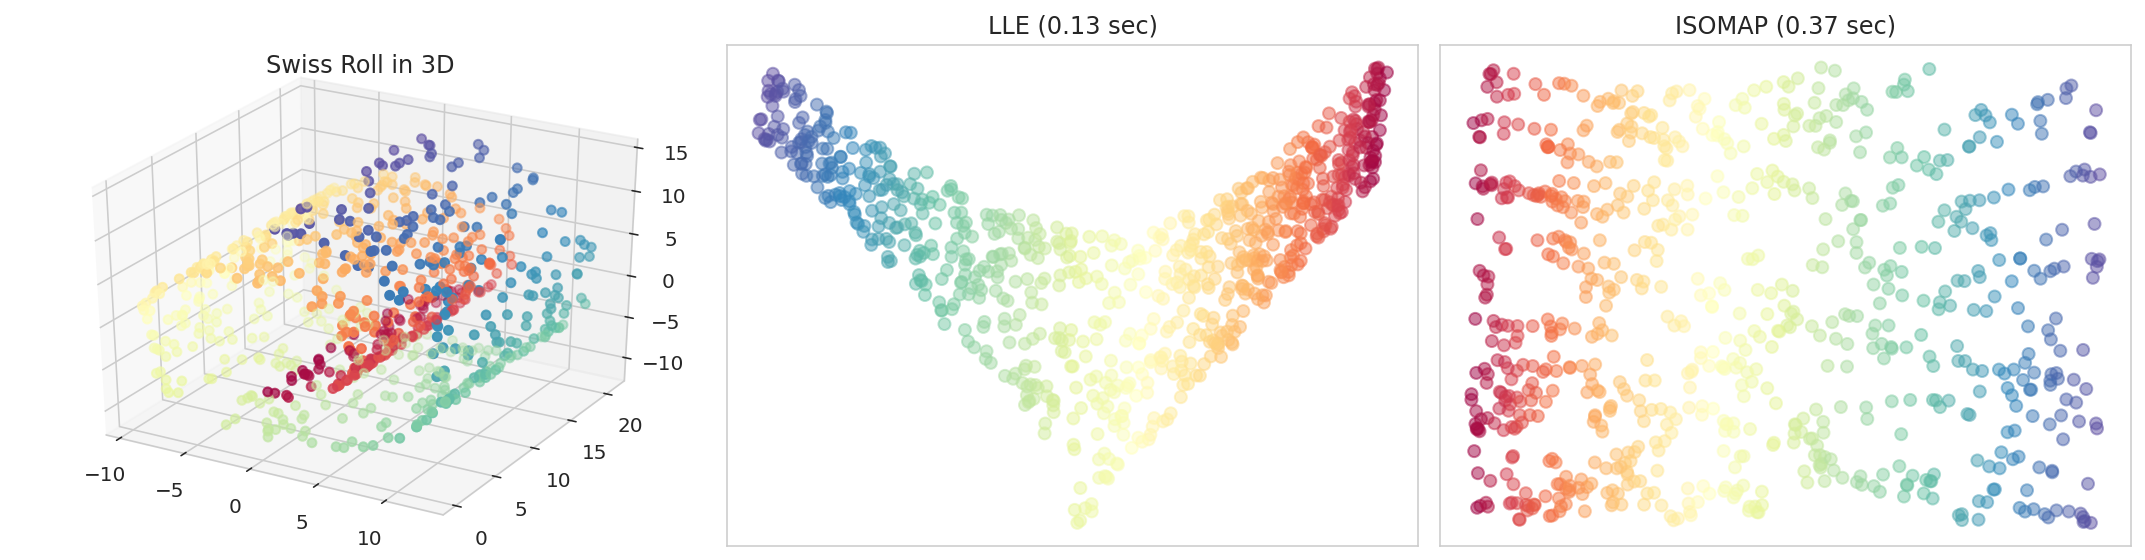

In [ ]:
from collections import OrderedDict
from time import time

from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter


X, color = make_swiss_roll(n_samples=800, random_state=123)

methods = OrderedDict()


from sklearn.manifold import Isomap, LocallyLinearEmbedding


methods['LLE'] = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
methods['ISOMAP'] = Isomap(n_components=2, n_neighbors=10)


  
fig = plt.figure(figsize=(15,4))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll in 3D")


# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(1, 3, 2 + i)
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral,alpha=0.5)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.tight_layout();

hw

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
data1 = pd.read_excel('/content//gdrive/MyDrive/L01-dimensionality-reduction.xlsx',sheet_name='MTCARS')

In [10]:
data1

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
